<a href="https://colab.research.google.com/github/divyanshuraj1095/Digit-Classification-With-NN/blob/main/MNIST_Digit_Classification_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

## Loading the mnist data from keras.dataset

In [ ]:
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
print(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data = 60000 images

test data = 10,000 images

Image dimension -> 28x28

GrayScale Image -> 1 Channel


In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


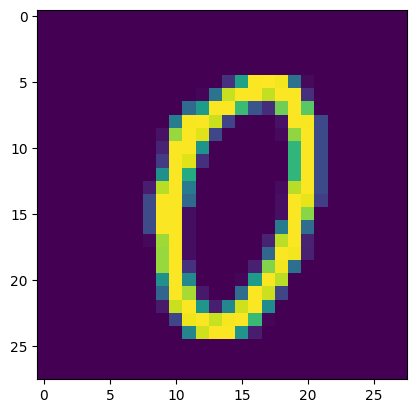

0


In [ ]:
## displaying the image
plt.imshow(X_train[1000])
plt.show()

## printing the corresponding lable
print(Y_train[1000])

Image Lables

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these lables as such or we can also apply one hot encoding

ALL the images have the same dimesnion in the dataset if not we have to resize all the images to a common dimension

In [ ]:
#scaling the values

# normalization(between 0 and 1)

X_train = X_train/255
X_test = X_test/255

Building the Neural Network


In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# setting up the layers of the neural network

model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(50, activation='relu'),
                         keras.layers.Dense(50, activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')#10 is the number of labels (0 to 9 )here

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compiling the neural network

model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',#for one hot encoding remove sparse
              metrics = ['accuracy'])

In [ ]:
#training the neural network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8480 - loss: 0.5216
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9536 - loss: 0.1558
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9662 - loss: 0.1116
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9742 - loss: 0.0864
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9789 - loss: 0.0686
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9834 - loss: 0.0559
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0472
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0399
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9890 - loss: 0.0349
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0300


Training data accuracy = 99.05%

Accuracy on test data:

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1325
0.9703999757766724


Test data accuracy = 96.77%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


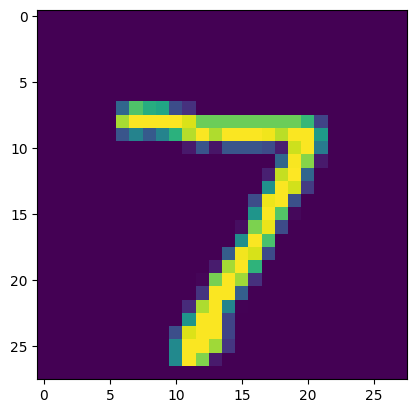

In [ ]:
##first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)##predict return the label value

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[2.6642432e-05 1.4979001e-02 1.7168298e-02 9.9077696e-01 4.9483933e-09
 2.9275196e-05 2.5380837e-12 9.9999481e-01 3.1765692e-02 9.4388977e-02]


model.predict() gives the predicton probablity of each class for the particular datapoint

In [ ]:
#converting the prediction probablity to class label
lable_for_first_test_image = np.argmax(Y_pred[0])
print(lable_for_first_test_image)

7


In [ ]:
#converting the prediction probablity to class label for all test datas

Y_pred_lables = [np.argmax(i) for i in Y_pred]
print(Y_pred_lables)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test ---> True lables

Y_pred_lables --> Predicted lables

Confusion matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_lables)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 955    0    2    1    2    3    1    1    3   12]
 [   1 1108    2    2    2    0    5    4   11    0]
 [   3    1  998    8    2    0    2    3   14    1]
 [   0    0    8  983    0    6    2    2    4    5]
 [   0    1    3    1  964    0    4    2    1    6]
 [   2    0    1   22    4  840    5    3   12    3]
 [   3    1    2    1    5    4  938    1    2    1]
 [   0    2    7    6    1    0    0  993    3   16]
 [   0    0    5    7    4    2    1    2  948    5]
 [   0    1    0    5   14    1    1    3    6  978]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted lables')

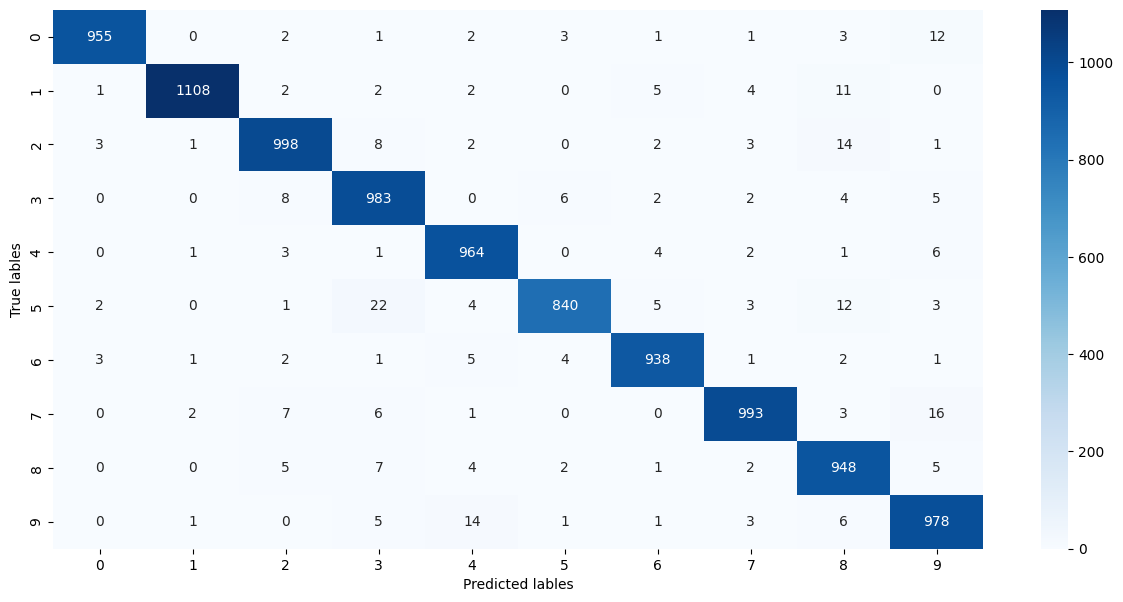

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True lables')
plt.xlabel('Predicted lables')

Building a predictive system

In [ ]:
input_image_path = '/content/3.png'

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


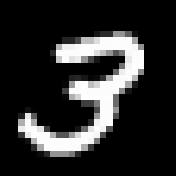

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(176, 176, 3)

In [ ]:
greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
greyscale.shape

(176, 176)

In [ ]:
input_image_resize = cv2.resize(greyscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28]) # 1->going to pridict for 1 image and its dimension is 28,28

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[9.8035178e-15 1.6582584e-05 1.3514049e-05 1.0000000e+00 2.7006056e-13
  3.0932760e-01 1.9340204e-19 3.1882962e-08 1.2063472e-02 4.2065573e-01]]


In [ ]:
input_pred_lable = np.argmax(input_prediction)

In [ ]:
print(input_pred_lable)

3


predictive system

Path of the image to be predicted: /content/3.png


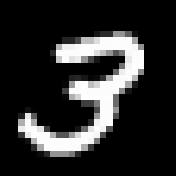

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The Handwritten digit is recognized as:  3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(greyscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_lable = np.argmax(input_prediction)

print('The Handwritten digit is recognized as: ',input_pred_lable)


